In [1]:
import tsyganenko as tsyg
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from spacepy import coordinates as coord
import spacepy.time as spt
from spacepy.time import Ticktock
import datetime as dt
from mpl_toolkits.mplot3d import Axes3D
import sys
earth_radius_ax = 1.5*6371 #km
#adding the year data here so I don't have to crush my github repo
pathname = '../../data-se3-path-planner/yearData/cuspCrossings2019/'
sys.path.append(pathname)

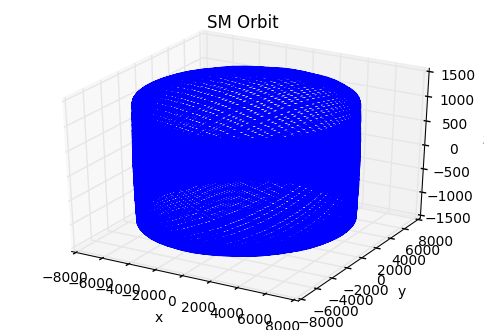

In [2]:
df = pd.read_csv(pathname+'Jan0.csv')
# df = pd.read_csv(pathname+'65_year.csv')
# df = pd.read_csv(pathname+'Jan65.csv')
# df = pd.read_csv(pathname+'Jan80.csv')
# df = pd.read_csv(pathname+'Jul65.csv')
# df = pd.read_csv(pathname+'Jul90.csv')
GMAT_MJD_OFFSET = 29999.5
t = df['DefaultSC.A1ModJulian'] + GMAT_MJD_OFFSET
x = df['DefaultSC.gse.X']
y = df['DefaultSC.gse.Y']
z = df['DefaultSC.gse.Z']

spacecraft = coord.Coords([[i,j,k] for i,j,k in zip(x,y,z)], 'GSE', 'car')
spacecraft.ticks = Ticktock(t,'MJD')
spacecraft = spacecraft.convert('SM','car')
points = 10000
# this figure validates what I already expected
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot(spacecraft.x[:points],spacecraft.y[:points],spacecraft.z[:points])
plt.title('SM Orbit')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

# okay i've looked at a couple of orbits from the GSE point of view and
# i now think that it's okay for a zero inclined orbit WRT to the earth
# equator to be inclined WRT to the ecliptic, but like holy moley
# these orbits are confusing sometimes.


psi is [-0.35086542 -0.35019092 -0.34913625 ..., -0.35296052 -0.35186214
 -0.35175021]


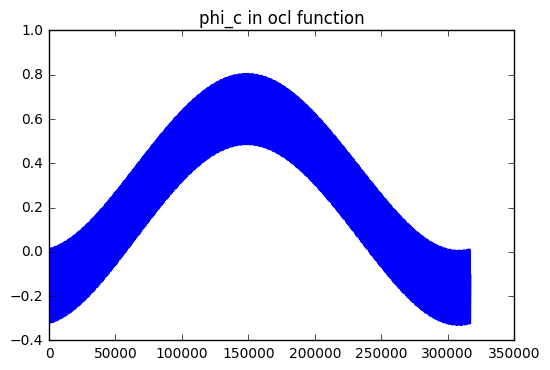

type(phi_c) False
the quantity is a vector


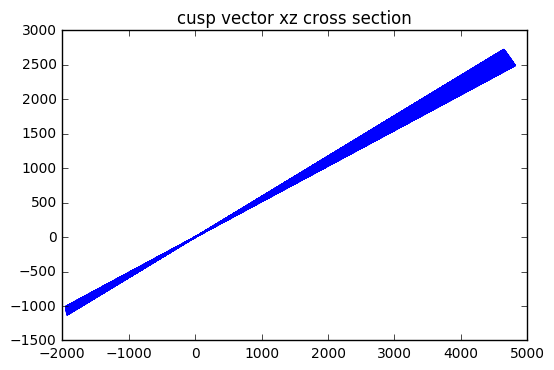

x equals to [-603.06171695 -598.50640318 -591.37808623 ..., -620.07145635 -612.75541665
 -612.01307292]
y equals to [ 0.  0.  0. ...,  0.  0.  0.]
sum of the y vector 0.0
z equals to [-328.25405778 -324.5397513  -318.80020033 ..., -349.07088645 -342.86522004
 -342.24951894]


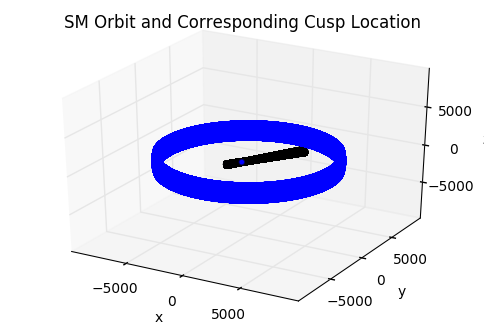

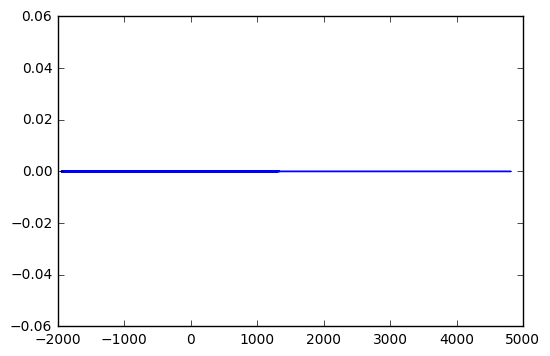

In [3]:
# goal, plot PHI on the same plot
xc,yc,zc = tsyg.orbitalCuspLocation(spacecraft,t)
cusp_location = coord.Coords([[i,j,k] for i,j,k in zip(xc,yc,zc)], 'SM', 'car')
cusp_location.ticks = Ticktock(t,'MJD')
# cusp_location = cusp_location.convert('SM','car')

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
# if I just want to :points
# ax.plot(spacecraft.x[:points],spacecraft.y[:points],spacecraft.z[:points])
# ax.plot(cusp_location.x[:points], cusp_location.y[:points],cusp_location.z[:points])

# if I want EVERYTHING
ax.plot(spacecraft.x,spacecraft.y, spacecraft.z)
ax.scatter(cusp_location.x, cusp_location.y,cusp_location.z)
plt.title('SM Orbit and Corresponding Cusp Location')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_xlim3d(-earth_radius_ax, earth_radius_ax)
ax.set_ylim3d(-earth_radius_ax, earth_radius_ax)
ax.set_zlim3d(-earth_radius_ax, earth_radius_ax)
plt.show()
plt.plot(cusp_location.x,cusp_location.y)
plt.show()

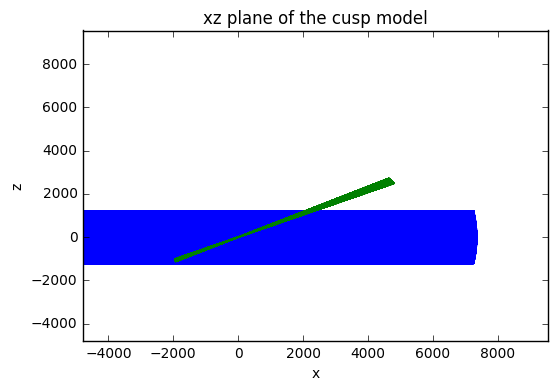

In [4]:
plt.plot(spacecraft.x,spacecraft.z)
plt.plot(cusp_location.x,cusp_location.z)
plt.xlim([-0.5*earth_radius_ax, earth_radius_ax])
plt.ylim([-0.5*earth_radius_ax, earth_radius_ax])
plt.xlabel('x')
plt.ylabel('z')
plt.title('xz plane of the cusp model')
plt.show()



In [5]:
# the working configuration is 'SM'
spacecraft_sph = spacecraft.convert('SM','sph')
cusp_location_sph = cusp_location.convert('SM','sph')

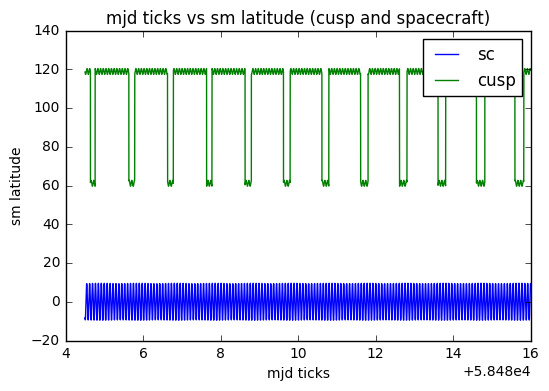

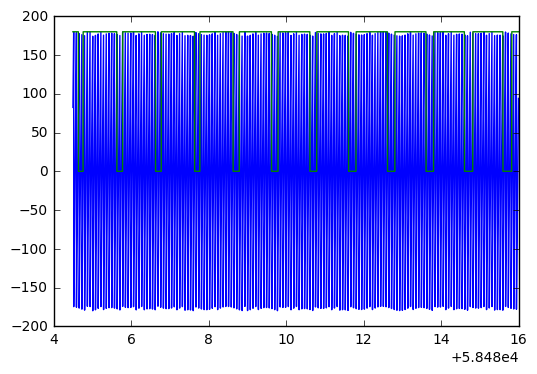

modlat [ 118.56000711  118.46873751  118.32822674 ...,  119.37745223  119.22904711
  119.21476269]


In [6]:
# making the plots
points = 10000# len(spacecraft_sph.ticks.MJD)
lowBound = 0# 156000
highBound = points# 166000
plt.plot(spacecraft_sph.ticks.MJD[lowBound:highBound],spacecraft_sph.lati[lowBound:highBound],label='sc')
# i was doing 90 - cusp location?
plt.plot(cusp_location_sph.ticks.MJD[lowBound:highBound],90-cusp_location_sph.lati[lowBound:highBound],label='cusp')
plt.legend()
plt.xlabel('mjd ticks')
plt.ylabel('sm latitude')
plt.title('mjd ticks vs sm latitude (cusp and spacecraft)')
plt.show()


plt.plot(spacecraft_sph.ticks.MJD[lowBound:highBound], spacecraft_sph.long[lowBound:highBound],label='sc')
plt.plot(cusp_location_sph.ticks.MJD[lowBound:highBound],cusp_location_sph.long[lowBound:highBound],label='cusp')
plt.show()

modlat = 90-cusp_location_sph.lati 
print("modlat",modlat)

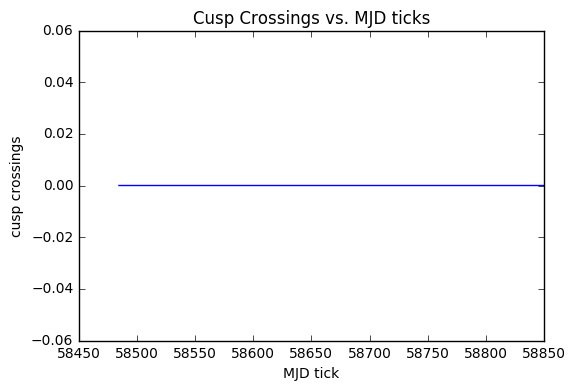

final crossings count =  0
mean sm lat of cusp 75.6217789395
mean sm lon of cusp 45.153834278


In [7]:
# count it up
count = []
c = 0
for satlat,cusplat, satlon,cusplon in zip(spacecraft_sph.lati, modlat, spacecraft_sph.long, cusp_location_sph.long):
    if 0<=cusplon<180 and abs(satlat - cusplat)<=4 and abs(satlon-cusplon)<=4:
        # right now i'm using +/- 2 deg for the latitude,
        # and +/- 2 deg for the longitude
        c+=1
        count.append(c)
    else:
        count.append(c)
        
plt.plot(spacecraft_sph.ticks.MJD, count)
plt.xlabel('MJD tick')
plt.ylabel('cusp crossings')
plt.title('Cusp Crossings vs. MJD ticks')
#plt.xlim([58700, 58800])
plt.show()
print("final crossings count = ",c)

# mean latitude of the cusp 
print("mean sm lat of cusp", 90 - sum(cusp_location_sph.lati)/len(cusp_location_sph.lati))
print("mean sm lon of cusp", sum(cusp_location_sph.long)/len(cusp_location_sph.long))

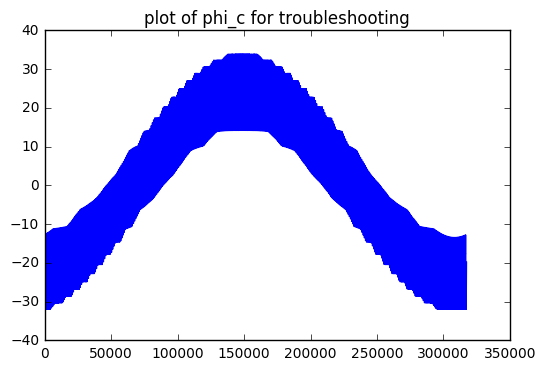

UTC date [datetime.datetime(2019, 1, 1, 12, 0, 5, 34372)
 datetime.datetime(2019, 1, 1, 12, 1, 5, 34369)
 datetime.datetime(2019, 1, 1, 12, 2, 39, 654374) ...,
 datetime.datetime(2020, 1, 1, 11, 58, 17, 840586)
 datetime.datetime(2020, 1, 1, 11, 59, 55, 746714)
 datetime.datetime(2020, 1, 1, 12, 0, 5, 34372)]


In [8]:
# lets' see if we can check the psi function before 1pm
r = 1.127
psi = tsyg.getTilt(t)
psi = np.asarray(psi)
phic = tsyg.getPhi_c(r,psi)
plt.plot(phic)
plt.title('plot of phi_c for troubleshooting')
plt.show()

# show the date in UTC
print("UTC date", spacecraft_sph.ticks.UTC)